In [60]:
from RWTHColors import ColorManager

cm = ColorManager()

plot_colors = []
plot_colors_light = []
color_list = [
    cm.RWTHBlau,
    #   cm.RWTHPetrol,
    cm.RWTHTuerkis,
    cm.RWTHGruen,
    cm.RWTHMaiGruen,
    cm.RWTHOrange,
    cm.RWTHRot,
    # cm.RWTHBordeaux,
    # cm.RWTHViolett,
    cm.RWTHLila,
]
intensities = [100, 50, 10]

for intensity in intensities:
    for color in color_list:
        plot_colors.append(color.p(intensity))

for intensity in [75, 50, 10]:
    for color in color_list:
        plot_colors_light.append(color.p(intensity))

# Status Quo Processes


In [61]:
import pandas as pd

data_status_quo = pd.read_excel("process_contributions_status_quo.xlsx", index_col=0)

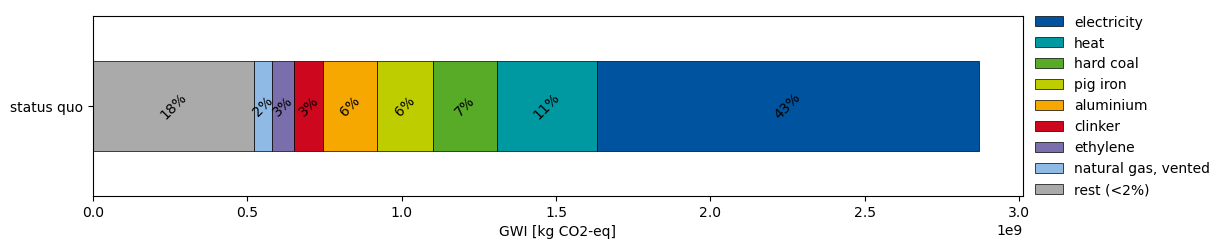

In [62]:
import matplotlib.pyplot as plt
import RWTHColors

plt.style.use("rwth")

colors = plot_colors[: len(data_status_quo) - 1] + ["#aaaaaa"]

ax = data_status_quo.transpose().plot(
    kind="barh",
    stacked=True,
    figsize=(12, 7 / 3),
    xlabel="GWI [kg CO2-eq]",
    color=colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    reversed(handles),
    reversed(labels),
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,
)
ax.invert_yaxis()
_ = ax.set_yticklabels(["status quo"])

# ADDING PERCENTAGES
# Calculate the total for each bar (row in the data)
totals = data_status_quo.sum(axis=1)
# Adding percentage labels to each bar
for bar in ax.patches:
    width = (
        bar.get_width()
    )  # Get the width of the bar (which is the length along the x-axis)
    label_x_pos = bar.get_x() + width / 2  # X position for the label
    label_y_pos = bar.get_y() + bar.get_height() / 2  # Y position for the label
    total_width = sum(
        [p.get_width() for p in ax.patches if p.get_y() == bar.get_y()]
    )  # Sum width of all bars in this row
    percentage = width / total_width * 100  # Calculate percentage
    ax.text(
        label_x_pos,
        label_y_pos,
        f"{percentage:.0f}%",
        ha="center",
        va="center",
        rotation=45,
    )

# Transition overview static vs prospective


In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Example DataFrame for the main product's scores
# data_main = {'Score': [3, 5, 2]}
# df_main = pd.DataFrame(data_main)

# # Example DataFrames for the add-ons with multiple entries
# data_addon1 = {'Score': [4, 1, 2]}
# df_addon1 = pd.DataFrame(data_addon1)

# data_addon2 = {'Score': [6, 3, 1, 2]}
# df_addon2 = pd.DataFrame(data_addon2)

# # Plotting the main horizontal stacked bar
# fig, ax = plt.subplots()

# # Settings for the bars
# base_bar_height = 0.5
# addon_bar_height = base_bar_height * 0.3  # 40% of the base bar's height

# # Plot the main product's scores
# left_extent = 0
# for score in df_main['Score']:
#     ax.barh(0, width=score, left=left_extent, height=base_bar_height)
#     left_extent += score

# # Starting point for the add-ons
# addon_start = sum(df_main['Score'])

# # Function to plot each set of add-on bars with varying colors
# def plot_addons(df, addon_start, y_position, bar_height):
#     colors = plt.cm.viridis(np.linspace(0, 1, len(df)))  # Generate colors
#     for idx, score in enumerate(df['Score']):
#         ax.barh(y_position, width=score, left=addon_start, height=bar_height, color=colors[idx])
#         addon_start += score

# # Plotting the add-on bars with different colors
# plot_addons(df_addon1, addon_start, 0.12, addon_bar_height)
# plot_addons(df_addon2, addon_start, -0.12, addon_bar_height)

# # Customize the chart
# ax.set_xlabel('LCA Score')
# ax.set_title('LCA Score Analysis with Add-ons')
# ax.set_yticks([])
# ax.set_yticklabels([])

# plt.show()

In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Example DataFrame for the main product's scores
# data_base = {"Score": [i * 10**10 for i in [6.4269]]}
# df_base = pd.DataFrame(data_base)

# # Example DataFrames for the add-ons with multiple entries
# data_addon1 = {"Score": [i * 10**9 for i in [2.9, 7.2, 7.2, 2.9, 2.8, 4.6]]}
# df_addon1 = pd.DataFrame(data_addon1)

# data_addon2 = {"Score": [i * 10**9 for i in [2.1, 5.4, 4.8, 1.7, 1.6, 2.5]]}
# df_addon2 = pd.DataFrame(data_addon2)

# # Plotting the main horizontal stacked bar
# fig, ax = plt.subplots(figsize=(12, 2))

# # Settings for the bars
# base_bar_height = 0.5
# addon_bar_height = base_bar_height * 0.4  # 40% of the base bar's height

# # Plot the main product's scores
# left_extent = 0
# for score in df_base["Score"]:
#     ax.barh(
#         0,
#         width=score,
#         left=left_extent,
#         height=base_bar_height,
#         color=cm.RWTHBlau.p(100),
#     )
#     mid_point = left_extent + score / 2
#     ax.text(mid_point, 0, "status quo", ha="center", va="center", color="black")
#     left_extent += score

# # Starting point for the add-ons
# addon_start = sum(df_base["Score"])


# def plot_addons(df, addon_start, y_position, bar_height, label, colors):
#     total_width = addon_start  # Initialize total width to the starting point
#     for (idx, score), year in zip(
#         enumerate(df["Score"]),
#         ["2024", "2029", "2034", "2036", "2039", "2044"],
#     ):
#         ax.barh(
#             y_position,
#             width=score,
#             left=addon_start,
#             height=bar_height,
#             color=colors[idx],
#         )
#         mid_point = addon_start + score / 2
#         ax.text(mid_point, y_position, year, ha="center", va="center", color="black", rotation=45)
#         addon_start += score
#         total_width += score  # Accumulate the total width

#     # Place the label to the right of the last bar
#     ax.text(total_width, y_position, label, ha="left", va="center")


# # Plotting the add-on bars with different colors and labels
# plot_addons(
#     df_addon1,
#     addon_start,
#     base_bar_height*0.3,
#     addon_bar_height,
#     "static expansion",
#     colors=plot_colors[1::],
# )  # Generate colors)
# plot_addons(
#     df_addon2,
#     addon_start,
#     -base_bar_height*0.3,
#     addon_bar_height,
#     "prospective expansion",
#     colors=plot_colors[1::],
# )  # Generate colors)

# # Customize the chart
# ax.set_xlabel("GWI [kg CO2-eq]")
# ax.set_yticks([])
# ax.set_yticklabels([])

# plt.show()

In [1]:
import pandas as pd

In [3]:
component_contributions_df = pd.read_excel("component_contributions_distributed_20240701.xlsx", index_col=0)

In [4]:
addons = component_contributions_df.sum().values

In [9]:
addons

array([1.34407663e+10, 2.87723354e+10, 1.93612635e+10, 6.89201087e+09,
       9.66778068e+09, 1.57672565e+10])

In [13]:
# # MIT CONTRIBUTIONS NACH SPANNUNGSEBENE?
# from brokenaxes import brokenaxes
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Example DataFrame for the main product's scores
# data_base = {"Score": [3.97306839*100]}
# df_base = pd.DataFrame(data_base)

# # Example DataFrames for the add-ons with multiple entries
# data_addon1 = {"Score": addons[:6]/1e9}
# df_addon1 = pd.DataFrame(data_addon1)

# data_addon2 = {"Score": addons[6:]/1e9}
# df_addon2 = pd.DataFrame(data_addon2)

# fig = plt.figure(figsize=(12, 2.5))
# fig.subplots_adjust(wspace=0.1)
# bax = brokenaxes(xlims=((0, 30), (370, 580)), d=0.007)

# # Settings for the bars
# base_bar_height = 1
# addon_bar_height = base_bar_height * 0.35  # 40% of the base bar's height

# # Plot the main product's scores
# left_extent = 0
# for score in df_base["Score"]:
#     bax.barh(
#         0,
#         width=score,
#         left=left_extent,
#         height=base_bar_height,
#         # color=cm.RWTHBlau.p(100),
#         color="#aaaaaa",
#         edgecolor="black",
#         linewidth=0.5,
#     )
#     mid_point = 370 + (score - 370) / 2
#     bax.text(
#         (mid_point),
#         0,
#         "status quo",
#         ha="center",
#         va="center",
#         color="black",
#         rotation=45,
#     )
#     left_extent += score

# # Starting point for the add-ons
# addon_start = sum(df_base["Score"])


# def plot_addons(df, addon_start, y_position, bar_height, label, colors):
#     total_width = addon_start  # Initialize total width to the starting point
#     for (idx, score), year in zip(
#         enumerate(df["Score"]),
#         ["2025", "2030", "2035", "2037", "2040", "2045"],
#     ):
#         bax.barh(
#             y_position,
#             width=score,
#             left=addon_start,
#             height=bar_height,
#             color=colors[idx],
#             edgecolor="black",
#             linewidth=0.5,
#         )
#         mid_point = addon_start + score / 2
#         bax.text( 
#             mid_point,
#             y_position,
#             year,
#             ha="center",
#             va="center",
#             color="black",
#             rotation=45,
#         )
#         addon_start += score
#         total_width += score  # Accumulate the total width

#     # Place the label to the right of the last bar
#     bax.text(total_width, y_position, label, ha="left", va="center")
# colors_addon = plot_colors[: len(df_addon1)][::-1]
# # Plotting the add-on bars with different colors and labels
# plot_addons(
#     df_addon1,
#     addon_start,
#     base_bar_height * 0.325,
#     addon_bar_height,
#     "   static expansion",
#     # colors=plot_colors[1::],
#     colors=colors_addon,
# )  # Generate colors)
# plot_addons(
#     df_addon2,
#     addon_start,
#     -base_bar_height * 0.325,
#     addon_bar_height,
#     "   prospective expansion",
#     # colors=plot_colors[1::],
#     colors=colors_addon,
# )  # Generate colors)

# # Customize the chart
# bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)

# import matplotlib.colors as mcolors
# def darken_color(color, amount=0.5):
#     try:
#         c = mcolors.cnames[color]
#     except:
#         c = color
#     c = mcolors.to_rgb(c)
#     return mcolors.to_hex([max(0, min(1, c[0] * amount)),
#                            max(0, min(1, c[1] * amount)),
#                            max(0, min(1, c[2] * amount))])
    
# x_static=addon_start
# x_prospective=addon_start
# for xpos, v1, v2, color in zip([7, 30, 61, 83, 96, 114], df_addon1.values, df_addon2.values, colors_addon):
#     reduction = int((v1-v2)/v1*100)
#     bax.text(addon_start + xpos, 0, f"-{reduction}%", horizontalalignment="center", verticalalignment="center", rotation=45, color=darken_color(color))

#     x_static = x_static + v1
#     x_prospective = x_prospective + v2
#     bax.plot([x_static, x_prospective], [base_bar_height * 0.325 - addon_bar_height / 2, - base_bar_height * 0.325 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")

# bax.axs[0].set_yticks([])  # Adjust this if you have specific y-ticks in mind
# bax.axs[0].set_yticklabels([])

# plt.savefig("fig_static_vs_prospective.svg", format="svg")
# plt.show()

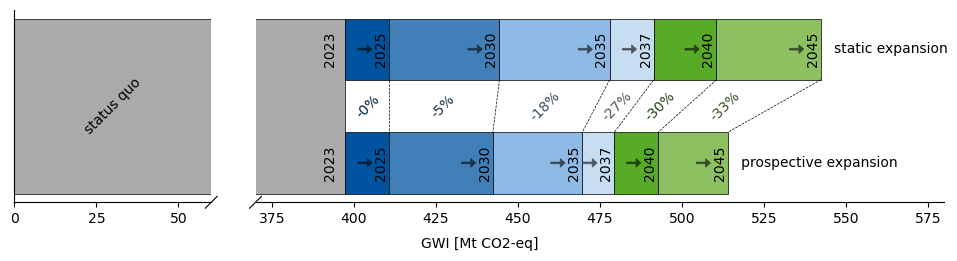

In [92]:
# MIT CONTRIBUTIONS NACH SPANNUNGSEBENE?
from brokenaxes import brokenaxes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
def darken_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgb(c)
    return mcolors.to_hex([max(0, min(1, c[0] * amount)),
                           max(0, min(1, c[1] * amount)),
                           max(0, min(1, c[2] * amount))])
# Example DataFrame for the main product's scores
data_base = {"Score": [3.97306839*100]}
df_base = pd.DataFrame(data_base)

# Example DataFrames for the add-ons with multiple entries
data_addon1 = {"Score": addons[:6]/1e9}
df_addon1 = pd.DataFrame(data_addon1)

data_addon2 = {"Score": addons[6:]/1e9}
df_addon2 = pd.DataFrame(data_addon2)

fig = plt.figure(figsize=(12, 2.5))
fig.subplots_adjust(wspace=0.1)
bax = brokenaxes(xlims=((0, 60), (370, 580)), d=0.007)

# Starting point for the add-ons
addon_start = sum(df_base["Score"])

# Settings for the bars
base_bar_height = 1
addon_bar_height = base_bar_height * 0.35  # 40% of the base bar's height

# Plot the main product's scores
left_extent = 0
for score in df_base["Score"]:
    bax.barh(
        0,
        width=score,
        left=left_extent,
        height=base_bar_height,
        # color=cm.RWTHBlau.p(100),
        color="#aaaaaa",
        edgecolor="black",
        linewidth=0.5,
    )
    mid_point = 370 + (score - 370) / 2
    mid_point = 30
    bax.text(
        # addon_start - 2.5,
        mid_point,
        0,
        "status quo",
        ha="center",
        va="center",
        color="black",
        rotation=45,
    )
    left_extent += score


def plot_addons(df, addon_start, y_position, bar_height, label, colors):
    bax.text(addon_start - 2.5, y_position, "2023", ha="right", va="center", rotation=90)
    total_width = addon_start  # Initialize total width to the starting point
    for (idx, score), year in zip(
        enumerate(df["Score"]),
        ["2025", "2030", "2035", "2037", "2040", "2045"],
    ):
        bax.barh(
            y_position,
            width=score,
            left=addon_start,
            height=bar_height,
            color=colors[idx],
            edgecolor="black",
            linewidth=0.5,
        )
        
        pos_year = addon_start + score - 2.5
        bax.text( 
            pos_year,
            y_position,
            year,
            ha="center",
            va="center",
            color="black",
            rotation=90,
        )
        bax.arrow(
            pos_year - 7.1,
            y_position,
            2.85,
            0,
            width=0.01,
            head_width=0.05,
            head_length=1.5,
            fc=darken_color(colors[idx], .4),
            ec=darken_color(colors[idx], .4),
            lw=0.5,
            # overhang=0.5,
        )
        addon_start += score
        total_width += score  # Accumulate the total width

    # Place the label to the right of the last bar
    bax.text(total_width, y_position, label, ha="left", va="center")
    
# colors_addon = plot_colors[: len(df_addon1)][::-1]
colors_addon = [
    cm.RWTHBlau.p(100),
    cm.RWTHBlau.p(75),
    cm.RWTHBlau.p(50),
    cm.RWTHBlau.p(25),
    # cm.RWTHOrange.p(100),
    # cm.RWTHOrange.p(75),
    cm.RWTHGruen.p(100),
    cm.RWTHGruen.p(75),
    # cm.RWTHOrange.p(100),
    # cm.RWTHOrange.p(75),
    # cm.RWTHOrange.p(50),
    # cm.RWTHOrange.p(25),
    # cm.RWTHGruen.p(100),
    # cm.RWTHGruen.p(75),
    ]
# Plotting the add-on bars with different colors and labels
plot_addons(
    df_addon1,
    addon_start,
    base_bar_height * 0.325,
    addon_bar_height,
    "   static expansion",
    # colors=plot_colors[1::],
    colors=colors_addon,
)  # Generate colors)
plot_addons(
    df_addon2,
    addon_start,
    -base_bar_height * 0.325,
    addon_bar_height,
    "   prospective expansion",
    # colors=plot_colors[1::],
    colors=colors_addon,
)  # Generate colors)

# Customize the chart
bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)

x_static=addon_start
x_prospective=addon_start
for xpos, v1, v2, color in zip([7, 30, 61, 83, 96, 116], df_addon1.values, df_addon2.values, colors_addon):
    reduction = int((v1-v2)/v1*100)
    bax.text(
        addon_start + xpos,
        0,
        f"-{reduction}%",
        horizontalalignment="center",
        verticalalignment="center",
        rotation=45,
        color=darken_color(color, 0.4),
        # color='black',
    )

    x_static = x_static + v1
    x_prospective = x_prospective + v2
    bax.plot([x_static, x_prospective], [base_bar_height * 0.325 - addon_bar_height / 2, - base_bar_height * 0.325 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")

bax.axs[0].set_yticks([])  # Adjust this if you have specific y-ticks in mind
bax.axs[0].set_yticklabels([])

plt.savefig("fig_static_vs_prospective_arrows.svg", format="svg", bbox_inches='tight')
plt.show()

In [24]:
cm.RWTHOrange.p(100)

'#F6A800'

In [ ]:
colors_addon = [
    cm.RWTHBlau.p(100),
    cm.RWTHPetrol.p(100),
    cm.RWTHTuerkis.p(100),
    cm.RWTHGruen.p(100),
    cm.RWTHBordeaux.p(100),
    cm.RWTHViolett.p(100),
    ]

In [110]:
colors_addon

['#CC071E', '#F6A800', '#BDCD00', '#57AB27', '#0098A1', '#00549F']

# Contribution plots


## components

In [80]:
component_contributions_df = pd.read_excel("component_contributions_distributed_20240701.xlsx", index_col=0)

# Map component names to new categories
category_map = {
    'Overhead line': 'overhead lines',
    'cable': 'cables',
    'Transformer': 'transformers',
    'switchgear': 'switchgears',
    'Substation': 'substations',
}

# Function to map each component to a category
def map_category(component):
    for key, value in category_map.items():
        if key.lower() in component.lower():
            return value
    return 'other components'  # Return 'others' if no category found

# Apply the mapping function to the index
component_contributions_df.index = component_contributions_df.index.map(map_category)

# Aggregate the DataFrame by summing scores within the new categories
component_contributions_df_aggregated = component_contributions_df.groupby(component_contributions_df.index).sum()
# # Sum the values of the first six columns
component_contributions_df_aggregated['static'] = component_contributions_df_aggregated.iloc[:, :6].sum(axis=1)

# Sum the values of the last six columns
component_contributions_df_aggregated['prospective'] = component_contributions_df_aggregated.iloc[:, -7:-1].sum(axis=1)

component_contributions_df_aggregated = component_contributions_df_aggregated[['static', 'prospective']]

# Assign a temporary sort key that penalizes the 'others' category
component_contributions_df_aggregated['sort_key'] = component_contributions_df_aggregated.index != 'other components'

# Sort the DataFrame by this sort key first, then by the desired column
component_contributions_df_aggregated = component_contributions_df_aggregated.sort_values(by=['sort_key', "static"], ascending=[True, True])

# Drop the temporary sort key column
component_contributions_df_aggregated = component_contributions_df_aggregated.drop(columns='sort_key')


component_contributions_df_aggregated.loc["SPACING"] = [0, component_contributions_df_aggregated['static'].sum() - component_contributions_df_aggregated['prospective'].sum()]

## materials

In [81]:
# material_contributions_df_static = pd.read_excel("material_contributions_distributed_20240621.xlsx", index_col=0, header=1).dropna()
# material_contributions_df_prospective = pd.read_excel("material_contributions_distributed_PROSPECTIVE_20240621.xlsx", index_col=0, header=1).dropna()

# material_contributions_df = pd.concat([material_contributions_df_static, material_contributions_df_prospective])

material_contributions_df = pd.read_excel("material_contributions_distributed_20240622.xlsx", index_col=0, header=1).dropna()
# # Sum the values of the first six columns
material_contributions_df['static'] = material_contributions_df.iloc[:, :6].sum(axis=1)

# Sum the values of the last six columns
material_contributions_df['prospective'] = material_contributions_df.iloc[:, -7:-1].sum(axis=1)

material_contributions_df_aggregated = material_contributions_df[['static', 'prospective']]

# Map component materials to new categories
material_map = {
    'aluminium': 'aluminium',
    'copper': 'copper',
    'iron': 'iron & steel',
    'steel': 'iron & steel',
    'concrete': 'concrete & cement',
    'cement': 'concrete & cement',
    'sulfur hexafluoride': 'SF6'
}


# Function to map each component to a category
def map_category(component):
    for key, value in material_map.items():
        if key.lower() in component.lower():
            return value
    return 'other materials (<1%)'  # Return 'others' if no category found

# Apply the mapping function to the index
material_contributions_df_aggregated.index = material_contributions_df_aggregated.index.map(map_category)

# Aggregate the DataFrame by summing scores within the new categories
material_contributions_df_aggregated = material_contributions_df_aggregated.groupby(material_contributions_df_aggregated.index).sum()

# Assign a temporary sort key that penalizes the 'others' category
material_contributions_df_aggregated['sort_key'] = material_contributions_df_aggregated.index != 'other materials (<1%)'

# Sort the DataFrame by this sort key first, then by the desired column
material_contributions_df_aggregated = material_contributions_df_aggregated.sort_values(by=['sort_key', "static"], ascending=[True, True])

# Drop the temporary sort key column
material_contributions_df_aggregated = material_contributions_df_aggregated.drop(columns='sort_key')

material_contributions_df_aggregated.loc["SPACING"] = [0, material_contributions_df_aggregated['static'].sum() - material_contributions_df_aggregated['prospective'].sum()]

## processes

In [82]:
process_emissions = pd.read_excel("process_contributions.xlsx", index_col="index")
process_emissions.drop(columns="Unnamed: 0", inplace=True)

column_renaming = {
    "grid_expansion_overall_prospective | grid_expansion_overall_prospective | GLO | unit | pLCA_Grid_Expansion": "prospective",
    "grid_expansion_overall_static | grid_expansion_overall_static | GLO | unit | pLCA_Grid_Expansion": "static",
}

process_emissions= process_emissions.rename(columns=column_renaming).fillna(0).drop(index="Total")
process_emissions = process_emissions[['static', 'prospective']]

# Map component names to new categories
category_map = {
    'aluminium': 'aluminium (process emissions)',
    'iron': 'iron & steel (process emissions)',
    'steel': 'iron & steel (process emissions)',
    'coal': 'coal',
    'coke': 'coal',
    'clinker': 'clinker',
    'electricity': 'electricity',
    'heat': 'heat',
    'transport': 'transport',
    'diesel': 'transport',
    'Gas insulated switchgear': 'SF6',
    'sulfur hexafluoride': 'SF6',
}

# Function to map each component to a category
def map_category(component):
    for key, value in category_map.items():
        if key.lower() in component.lower():
            return value
    return 'other processes (<1%)'  # Return 'others' if no category found

# Apply the mapping function to the index
process_emissions.index = process_emissions.index.map(map_category)

# Aggregate the DataFrame by summing scores within the new categories
process_emissions = process_emissions.groupby(process_emissions.index).sum()

# Assign a temporary sort key that penalizes the 'others' category
process_emissions['sort_key'] = process_emissions.index != 'other processes (<1%)'

# Sort the DataFrame by this sort key first, then by the desired column
process_emissions = process_emissions.sort_values(by=['sort_key', "static"], ascending=[True, True])

# Drop the temporary sort key column
process_emissions = process_emissions.drop(columns='sort_key')


process_emissions.loc["SPACING"] = [0, process_emissions['static'].sum() - process_emissions['prospective'].sum()]

In [83]:
process_emissions['static'].sum()

144252701718.5628

In [84]:
material_contributions_df_aggregated['static'].sum()

142628300494.64417

## plotting

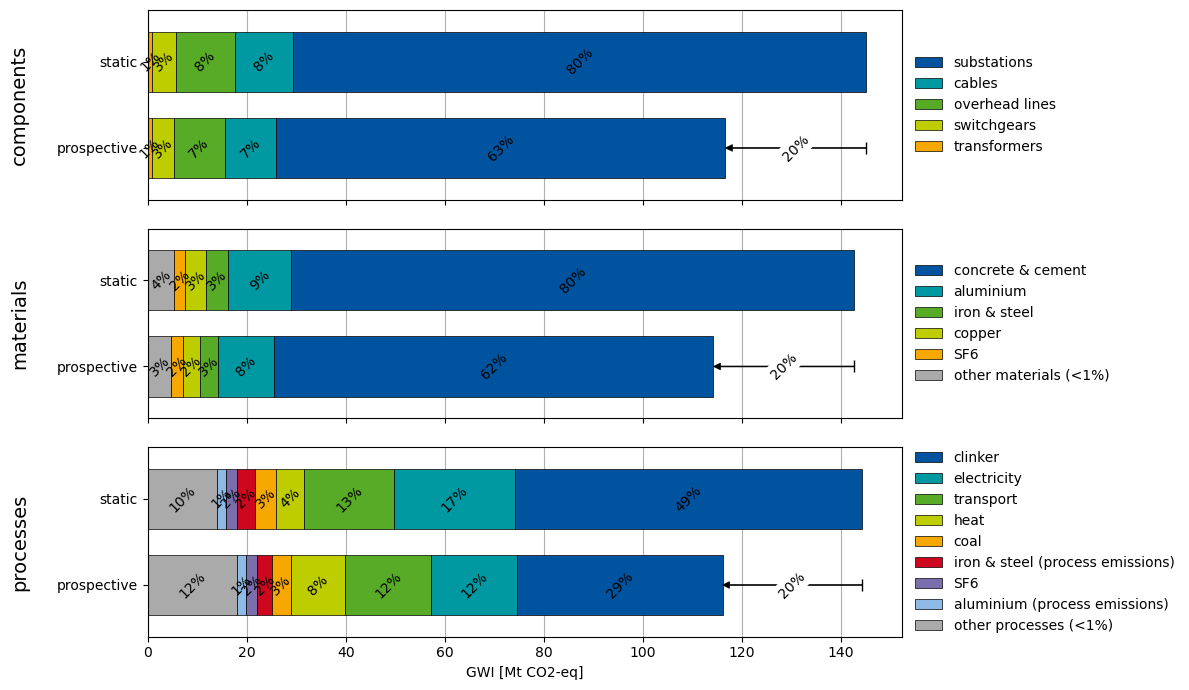

In [90]:
import matplotlib.pyplot as plt
import RWTHColors

components = component_contributions_df_aggregated / 1e9
materials = material_contributions_df_aggregated / 1e9
processes = process_emissions / 1e9

plt.style.use("rwth")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 7), sharex=True)

# Plotting each DataFrame on its respective axis
component_colors = ["none"] + plot_colors[: len(components) - 1] # was -2, but there is no others here+ ["#aaaaaa"]
components.transpose().plot(
    kind="barh",
    stacked=True,
    ax=axes[0],
    width=0.7,
    color=component_colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

material_colors = ["none"] + plot_colors[: len(materials) - 2] + ["#aaaaaa"]
materials.transpose().plot(
    kind="barh",
    stacked=True,
    ax=axes[1],
    width=0.7,
    color=material_colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

process_colors = ["none"] + plot_colors[: len(processes) - 2] + ["#aaaaaa"]
processes.transpose().plot(
    kind="barh",
    stacked=True,
    ax=axes[2],
    width=0.7,
    color=process_colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

# Increase the size of the labels
axes[0].set_ylabel("components", fontsize=14, labelpad=20)  # Adjust fontsize as needed
axes[1].set_ylabel("materials", fontsize=14, labelpad=20)  # Adjust fontsize as needed
axes[2].set_ylabel("processes", fontsize=14, labelpad=20)  # Adjust fontsize as neede

for ax, data in zip(axes, [components, materials, processes]):
    ax.invert_yaxis()
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    handles, labels = ax.get_legend_handles_labels()
    handles, labels = zip(*[(h, l) for h, l in zip(handles, labels) if l != "SPACING"])
    ax.legend(
        handles[::-1],
        labels[::-1],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=False,
    )
    ax.xaxis.grid(
        True
    )  # Enable vertical grid lines (which are horizontal for the x-axis)
    ax.set_axisbelow(True)  # Ensure grid lines are below the bars

    # ADDING PERCENTAGES
    # Calculate the total for each bar (row in the data)
    totals = data.sum(axis=1)

    # Adding percentage labels to each bar
    for bar in ax.patches:
        width = (
            bar.get_width()
        )  # Get the width of the bar (which is the length along the x-axis)
        label_x_pos = bar.get_x() + width / 2  # X position for the label
        label_y_pos = bar.get_y() + bar.get_height() / 2  # Y position for the label
        total_width = sum(
            [p.get_width() for p in ax.patches if p.get_y() == bar.get_y()]
        )  # Sum width of all bars in this row
        percentage = width / total_width * 100  # Calculate percentage

        if percentage > 0:
            bbox_props = None
            if bar is ax.patches[-1]:  # Check if the current patch is the last one
                bbox_props = dict(
                    boxstyle="round,pad=0.3", ec="none", fc="white", alpha=1
                )

            ax.text(
                label_x_pos,
                label_y_pos,
                f"{percentage:.0f}%",
                ha="center",
                va="center",
                rotation=45,
                bbox=bbox_props,  # Apply the bbox properties only for the last patch
            )

    ax.patches[-1].set_edgecolor("none")

    # Arrow for last bar
    bar = ax.patches[-1]
    x_end = bar.get_x() + bar.get_width()  # The end x-coordinate of the bar
    y_position = bar.get_y() + bar.get_height() / 2  # The vertical center of the bar
    width = (
        bar.get_width()
    )  # The width of the bar, which will be used to calculate the arrow's length

    # Parameters for the arrow
    head_width = (
        bar.get_height() / 9
    )  # Adjust the size of the arrowhead to your liking
    head_length = (
        0.05 * width
    )  # Adjust the length of the arrowhead to your liking, proportional to the bar's width

    # Draw an arrow that starts from the end of the bar and points to its start
    ax.arrow(
        x_end,
        y_position,
        -width + head_length,
        0,  # Add head_length so arrowhead doesn't extend beyond the bar
        head_width=head_width,
        head_length=head_length,
        width=0.01,
        fc="black",
        ec="black",
        lw=0.5,
    )

    ax.plot(x_end, y_position, marker="|", color="black", markersize=8)


axes[-1].set_xlabel("GWI [Mt CO2-eq]")

plt.tight_layout(h_pad=0.5)
plt.savefig("fig_contributions.svg", format="svg", bbox_inches='tight')

plt.show()

# All impact categories


In [155]:
import pandas as pd
data_all_impact_categories = pd.read_excel("all_impact_categories.xlsx", index_col=0)

In [149]:
# data_all_impact_categories.columns = data_all_impact_categories.columns.map(renaming_dict)

In [150]:
renaming_dict = {
    "ionising radiation: human health": "IR-HH",
    "land use": "LU",
    "ozone depletion": "OD",
    "material resources: metals/minerals": "MR-MM",
    "human toxicity: carcinogenic": "HTOX-C",
    "human toxicity: non-carcinogenic": "HTOX-NC",
    "ecotoxicity: freshwater": "ECOTOX",
    "acidification": "AC",
    "eutrophication: freshwater": "EU-FW",
    "energy resources: non-renewable": "ER-NR",
    "water use": "WU",
    "photochemical oxidant formation: human health": "POF",
    "eutrophication: terrestrial": "EU-TE",
    "particulate matter formation": "PM",
    "eutrophication: marine": "EU-MA",
    "climate change": "CC",
}

In [151]:
renaming_dict = {
    "ionising radiation: human health": "IR-HH \n[kBq U235-eq]",
    "land use": "LU \n[-]",
    "ozone depletion": "OD \n[kg CFC-11-eq]",
    "material resources: metals/minerals": "MR-MM \n[kg Sb-eq]",
    "human toxicity: carcinogenic": "HTOX-C \n[CTUh]",
    "human toxicity: non-carcinogenic": "HTOX-NC \n[CTUh]",
    "ecotoxicity: freshwater": "ECOTOX \n[CTUe]",
    "acidification": "AC \n[mol H+-eq]",
    "eutrophication: freshwater": "EU-FW \n[kg P-eq]",
    "energy resources: non-renewable": "ER-NR \n[MJ]",
    "water use": "WU \n[m3 world eq. deprived]",
    "photochemical oxidant formation: human health": "POF \n[kg NMVOC-eq]",
    "eutrophication: terrestrial": "EU-TE \n[kg N-eq]",
    "particulate matter formation": "PM \n[disease incidence]",
    "eutrophication: marine": "EU-MA \n[kg N-eq]",
    "climate change": "CC \n[kg CO2-eq]",
}

In [153]:
units_dict = {
    "ionising radiation: human health": "ionising radiation: human health \n[kBq U235-eq]",
    "land use": "land use \n[-]",
    "ozone depletion": "ozone depletion \n[kg CFC-11-eq]",
    "material resources: metals/minerals": "material resources: metals/minerals \n[kg Sb-eq]",
    "human toxicity: carcinogenic": "human toxicity: carcinogenic \n[CTUh]",
    "human toxicity: non-carcinogenic": "human toxicity: non-carcinogenic \n[CTUh]",
    "ecotoxicity: freshwater": "ecotoxicity: freshwater \n[CTUe]",
    "acidification": "acidification \n[mol H+-eq]",
    "eutrophication: freshwater": "eutrophication: freshwater \n[kg P-eq]",
    "energy resources: non-renewable": "energy resources: non-renewable \n[MJ]",
    "water use": "water use \n[m3 world eq. deprived]",
    "photochemical oxidant formation: human health": "photochemical oxidant formation: human health \n[kg NMVOC-eq]",
    "eutrophication: terrestrial": "eutrophication: terrestrial \n[kg N-eq]",
    "particulate matter formation": "particulate matter formation \n[disease incidence]",
    "eutrophication: marine": "eutrophication: marine \n[kg N-eq]",
    "climate change": "climate change \n[kg CO2-eq]",
}

In [156]:
units_dict = {
    "ionising radiation: human health": "ionising radiation: human health [kBq U235-eq]",
    "land use": "land use [-]",
    "ozone depletion": "ozone depletion [kg CFC-11-eq]",
    "material resources: metals/minerals": "material resources: metals/minerals [kg Sb-eq]",
    "human toxicity: carcinogenic": "human toxicity: carcinogenic [CTUh]",
    "human toxicity: non-carcinogenic": "human toxicity: non-carcinogenic [CTUh]",
    "ecotoxicity: freshwater": "ecotoxicity: freshwater [CTUe]",
    "acidification": "acidification [mol H+-eq]",
    "eutrophication: freshwater": "eutrophication: freshwater [kg P-eq]",
    "energy resources: non-renewable": "energy resources: non-renewable [MJ]",
    "water use": "water use [m3 world eq. deprived]",
    "photochemical oxidant formation: human health": "photochemical oxidant formation: human health [kg NMVOC-eq]",
    "eutrophication: terrestrial": "eutrophication: terrestrial [kg N-eq]",
    "particulate matter formation": "particulate matter formation [disease incidence]",
    "eutrophication: marine": "eutrophication: marine [kg N-eq]",
    "climate change": "climate change [kg CO2-eq]",
}

In [ ]:
data_all_impact_categories.columns = data_all_impact_categories.columns.map(units_dict)

/Users/timodiepers/anaconda3/envs/ab/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:699: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


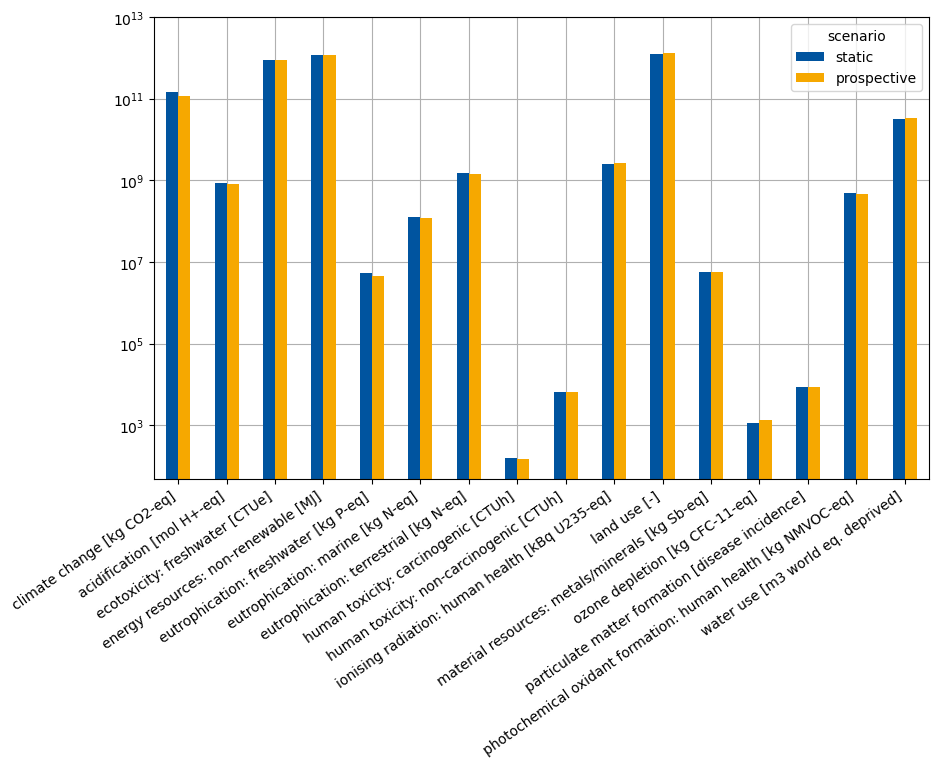

In [162]:
import matplotlib.pyplot as plt
data_all_impact_categories.T.plot(kind="bar", logy=True, ylim=[0, 1e13], grid=True, zorder=2, color=[cm.RWTHBlau.p(100), cm.RWTHOrange.p(100)], figsize=(10, 6), width=0.5)
plt.xticks(rotation=35, ha="right")
plt.savefig("all_impact_categories_absolute.svg", format="svg", bbox_inches='tight')

In [11]:
# Normalizing the 'prospective' row based on the 'static' row
data_all_impact_categories.loc["prospective"] = (
    data_all_impact_categories.loc["prospective"]
    / data_all_impact_categories.loc["static"]
)

# Setting 'static' row to 1s
data_all_impact_categories.loc["static"] = 1

## This is ths one!

In [61]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import LinearSegmentedColormap, Normalize
# from matplotlib.patches import Rectangle

# # Extracting the 'prospective' row for plotting
# prospective_values = data_all_impact_categories.loc["prospective"].sort_values(
#     ascending=True
# )#.rename(renaming_dict)

# # Custom colors (assuming cm is predefined)
# bordeaux = cm.RWTHBordeaux.p(100)
# red = cm.RWTHRot.p(100)
# orange = cm.RWTHOrange.p(100)
# yellow = cm.RWTHGelb.p(100)
# maigreen = cm.RWTHMaiGruen.p(100)
# green = cm.RWTHGruen.p(100)

# # Create a custom colormap
# cmap = LinearSegmentedColormap.from_list("custom_red_green", [green, green, maigreen, orange, red, red, red])

# # Normalize the values with a fixed midpoint at 1
# class MidpointNormalize(Normalize):
#     def __init__(self, vmin=None, vmax=None, midpoint=1, clip=False):
#         self.midpoint = midpoint
#         Normalize.__init__(self, vmin, vmax, clip)

#     def __call__(self, value, clip=None):
#         result, is_scalar = self.process_value(value)
#         self.autoscale_None(result)
#         vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
#         x, y = [vmin, midpoint, vmax], [0, 0.5, 1]
#         return np.ma.masked_array(np.interp(result, x, y))

# # Assuming 'prospective_values' contains your data
# # Normalizing with the midpoint at 1
# norm = MidpointNormalize(vmin=prospective_values.min(), vmax=prospective_values.max(), midpoint=1)

# # Setting up the plot
# plt.figure(figsize=(6, 7))
# bar_colors = cmap(norm(prospective_values.values))
# bars = plt.barh(prospective_values.index, prospective_values, color=bar_colors, height=0.6, edgecolor="black", linewidth=0.5)

# # Adding a vertical line for the 'static' value at x=1
# plt.axvline(x=1, color="black", linestyle="--", linewidth=1)

# # Adding text to the right of each bar
# for bar, value in zip(bars, prospective_values):
#     width = bar.get_width()
#     percentage_change = (width - 1) * 100
#     sign = "+" if percentage_change > 0 else ""
#     text = f"{sign}{percentage_change:.0f}%"
#     plt.text(width+0.005, bar.get_y() + bar.get_height() / 2.0, text, ha="left", va="center", bbox=dict(facecolor="white", edgecolor="none", pad=0))

# plt.text(x=1+0.02, y=plt.ylim()[0]+0.2, s="static (normalized)", ha='left', va='bottom', fontstyle='italic', rotation=90)


# # Enhancing the plot
# plt.xlim(right=1.3)
# plt.xlabel("relative environmental impact \ncompared to static scenario")
# plt.yticks(rotation=0)  # Adjust if necessary

# # Custom legend for abbreviations (if needed)
# # abbreviations = [f"{abbr}: {name}" for name, abbr in renaming_dict.items()]
# # custom_legend = [Rectangle((0, 0), 1, 1, fc="white", edgecolor='none', linewidth=0) for _ in renaming_dict]
# # plt.legend(custom_legend, abbreviations, loc='lower right', frameon=True, ncol=1, fontsize="small")

# plt.tight_layout()
# plt.show()

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import Rectangle

# Extracting the 'prospective' row for plotting
prospective_values = data_all_impact_categories.loc["prospective"].sort_values(ascending=True)

# Custom colors (assuming cm is predefined)
bordeaux = cm.RWTHBordeaux.p(100)
red = cm.RWTHRot.p(100)
orange = cm.RWTHOrange.p(100)
yellow = cm.RWTHGelb.p(100)
maigreen = cm.RWTHMaiGruen.p(100)
green = cm.RWTHGruen.p(100)

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_red_green", [green, green, maigreen, orange, red, red, red])

# Normalize the values with a fixed midpoint at 0
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        self.autoscale_None(result)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        x, y = [vmin, midpoint, vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(result, x, y))

# Shift values to center around 0
shifted_values = prospective_values - 1

# Normalizing with the midpoint at 0
norm = MidpointNormalize(vmin=shifted_values.min(), vmax=shifted_values.max(), midpoint=0)

# Setting up the plot
plt.figure(figsize=(9, 7))
# plt.figure(figsize=(6, 7)) # if shortened labels
bar_colors = cmap(norm(shifted_values.values))
bars = plt.barh(prospective_values.index, shifted_values, color=bar_colors, height=0.6, edgecolor="black", linewidth=0.5)

# Adding a vertical line for the 'static' value at x=0
plt.axvline(x=0, color="black", linestyle="--", linewidth=1)

# Adding text to the right of each bar
for bar, value in zip(bars, shifted_values):
    width = bar.get_width()
    percentage_change = width * 100
    sign = "+" if percentage_change > 0 else ""
    text = f"{sign}{percentage_change:.0f}%"
    plt.text(width + 0.005 if width > 0 else width - 0.005, bar.get_y() + bar.get_height() / 2.0, text, ha="left" if width > 0 else "right", va="center", bbox=dict(facecolor="white", edgecolor="none", pad=0))

plt.text(x=0.02, y=plt.ylim()[0] + 0.2, s="static (normalized)", ha='left', va='bottom', fontstyle='italic', rotation=90)

# Enhancing the plot
plt.xlim(-0.25, 0.22)
plt.xlabel("relative environmental impact \ncompared to static scenario")
plt.yticks(rotation=0)  # Adjust if necessary

plt.tight_layout()
plt.savefig("fig_burder_shifting.svg", format="svg")
plt.show()


/var/folders/l1/k90rhb0j0ns58y35ymznsd700000gn/T/ipykernel_82041/131027937.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of -2100314893x618 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x700 with 1 Axes>